In [56]:
import pandas as pd

In [91]:
acc_x=pd.read_csv("My_CSV_Data/acc_x.csv")
acc_y=pd.read_csv("My_CSV_Data/acc_y.csv")
acc_z=pd.read_csv("My_CSV_Data/acc_z.csv")
gyro_x=pd.read_csv("My_CSV_Data/gyro_x.csv")
gyro_y=pd.read_csv("My_CSV_Data/gyro_y.csv")
gyro_z=pd.read_csv("My_CSV_Data/gyro_z.csv")

labels=['Running','Sitting','Walking','Laying']

In [92]:
acc_y.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y
0,8.313267,-0.427964,-1.119888,-1.859696,-1.686117,-1.778892,-0.295684,2.358887,13.938444,12.170924,...,-1.626860,0.886453,0.812831,4.289811,12.952033,13.095685,14.953586,19.612701,19.612701,1
1,-2.203264,4.697424,15.050550,12.489353,19.612701,19.612701,19.612701,18.547880,15.368979,13.057378,...,19.612701,19.612701,17.615340,14.626178,12.881404,7.013216,2.628235,0.414795,-1.204283,1
2,19.612701,15.975311,13.641562,13.725958,12.202049,7.741053,3.257910,0.216675,-2.151789,-2.743755,...,1.154604,-1.454478,-3.786430,-2.903568,-0.994791,-0.827795,-1.062427,6.238092,19.612701,1
3,-4.101866,-4.763863,-0.402226,1.811214,3.081936,12.343905,15.051149,13.342886,19.612701,19.612701,...,12.618041,19.612701,19.612701,19.612701,19.612701,17.365744,16.440983,15.356410,10.322002,1
4,19.612701,19.612701,19.612701,18.835184,16.707937,13.915699,6.043564,1.247379,-0.632069,-2.583344,...,8.363545,3.077746,-1.177947,-1.237204,-3.933075,-5.796362,-2.371457,2.829348,4.743512,1


In [93]:
total=len(acc_x.index)
print(total)

1596


In [94]:
train_count=int(len(acc_x.index)*0.7)

In [95]:
test_count=int(len(acc_x.index)*0.3)

In [96]:
#int(len(acc_x.index)*0.7)+int(len(acc_x.index)*0.3)

In [97]:
train_acc_x=acc_x.iloc[:,0:50]
train_acc_y=acc_y.iloc[:,0:50]
train_acc_z=acc_z.iloc[:,0:50]
train_gyro_x=gyro_x.iloc[:,0:50]
train_gyro_y=gyro_y.iloc[:,0:50]
train_gyro_z=gyro_z.iloc[:,0:50]

train_y=acc_x.iloc[:,50:51]

# train_acc_x=acc_x.iloc[0:train_count]
# train_acc_y=acc_y.iloc[0:train_count]
# train_acc_z=acc_z.iloc[0:train_count]
# train_gyro_x=gyro_x.iloc[0:train_count]
# train_gyro_y=gyro_y.iloc[0:train_count]
# train_gyro_z=gyro_z.iloc[0:train_count]

# test_acc_x=acc_x.iloc[train_count:total]
# test_acc_y=acc_y.iloc[train_count:total]
# test_acc_z=acc_z.iloc[train_count:total]
# test_gyro_x=gyro_x.iloc[train_count:total]
# test_gyro_y=gyro_y.iloc[train_count:total]
# test_gyro_z=gyro_z.iloc[train_count:total]



In [98]:
train_acc_x.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.010774,0.715268,0.877475,0.705691,-0.076016,-1.429937,-1.756147,1.355118,-2.525284,-4.443040,...,0.082600,-1.707664,-3.358466,-1.350928,1.032499,-3.894169,-1.723227,5.094263,3.633800,6.215348
1,-0.136469,1.943493,-0.042497,-2.107496,-1.492785,-2.601899,0.655413,0.962469,-2.503737,-2.750339,...,-8.703522,-0.949301,1.957260,1.529895,2.334945,0.811036,0.794276,-0.580594,-1.127669,-1.735796
2,1.610699,-1.486799,-4.186860,-5.889736,-3.864242,0.073622,0.883460,2.085948,3.144784,2.143409,...,-1.529296,0.905008,3.154959,2.715025,2.006940,0.184354,-0.436343,-0.897227,-1.398812,-9.103952
3,-2.565387,-2.616264,-1.236605,-0.314239,2.093729,0.366911,0.899621,7.599795,4.955997,6.344634,...,1.654992,1.921347,8.297705,8.285733,-1.704073,-3.431490,-0.865504,-1.708263,-3.854066,-2.092532
4,-9.300875,-0.392051,2.607884,1.838148,3.376423,2.509123,0.949900,-0.506972,-1.646014,-2.181118,...,0.249596,0.289698,-0.333991,-2.997540,-3.569156,-2.766500,-2.561796,-0.594959,-1.236605,0.477045


In [99]:
train_acc_x.shape

(1596, 50)

In [100]:
train_data=pd.DataFrame()

sum_sqr_acc_xyz=train_acc_x.pow(2)+train_acc_y.pow(2)+train_acc_z.pow(2)
sum_sqr_gyro_xyz=train_gyro_x.pow(2)+train_gyro_x.pow(2)+train_gyro_x.pow(2)

train_acc_mag=sum_sqr_acc_xyz.pow(0.5)
train_gyro_mag=sum_sqr_gyro_xyz.pow(0.5)



train_data['x_acc_mean']=train_acc_x.mean(axis=1)
train_data['y_acc_mean']=train_acc_y.mean(axis=1)
train_data['z_acc_mean']=train_acc_z.mean(axis=1)
train_data['x_gyro_mean']=train_gyro_x.mean(axis=1)
train_data['y_gyro_mean']=train_gyro_y.mean(axis=1)
train_data['z_gyro_mean']=train_gyro_z.mean(axis=1)

train_data['x_acc_std']=train_acc_x.std(axis=1)
train_data['y_acc_std']=train_acc_y.std(axis=1)
train_data['z_acc_std']=train_acc_z.std(axis=1)
train_data['x_gyro_std']=train_gyro_x.std(axis=1)
train_data['y_gyro_std']=train_gyro_y.std(axis=1)
train_data['z_gyro_std']=train_gyro_z.std(axis=1)

train_data['x_acc_min']=train_acc_x.min(axis=1)
train_data['y_acc_min']=train_acc_y.min(axis=1)
train_data['z_acc_min']=train_acc_z.min(axis=1)
train_data['x_gyro_min']=train_gyro_x.min(axis=1)
train_data['y_gyro_min']=train_gyro_y.min(axis=1)
train_data['z_gyro_min']=train_gyro_z.min(axis=1)

train_data['x_acc_max']=train_acc_x.max(axis=1)
train_data['y_acc_max']=train_acc_y.max(axis=1)
train_data['z_acc_max']=train_acc_z.max(axis=1)
train_data['x_gyro_max']=train_gyro_x.max(axis=1)
train_data['y_gyro_max']=train_gyro_y.max(axis=1)
train_data['z_gyro_max']=train_gyro_z.max(axis=1)

train_data['x_acc_var']=train_acc_x.var(axis=1)
train_data['y_acc_var']=train_acc_y.var(axis=1)
train_data['z_acc_var']=train_acc_z.var(axis=1)
train_data['x_gyro_var']=train_gyro_x.var(axis=1)
train_data['y_gyro_var']=train_gyro_y.var(axis=1)
train_data['z_gyro_var']=train_gyro_z.var(axis=1)

# train_data['x_acc_range']=train_data['x_acc_max']-train_data['x_acc_min']
# train_data['y_acc_range']=train_data['y_acc_max']-train_data['y_acc_min']
# train_data['z_acc_range']=train_data['z_acc_max']-train_data['z_acc_min']
# train_data['x_gyro_range']=train_data['x_gyro_max']-train_data['x_gyro_min']
# train_data['y_gyro_range']=train_data['y_gyro_max']-train_data['y_gyro_min']
# train_data['z_gyro_range']=train_data['z_gyro_max']-train_data['z_gyro_min']



# train_data['mag_acc_mean']=train_acc_mag.mean(axis=1)
# train_data['mag_gyro_mean']=train_gyro_mag.mean(axis=1)

# train_data['mag_acc_std']=train_acc_mag.std(axis=1)
# train_data['mag_gyro_std']=train_gyro_mag.std(axis=1)

# train_data['mag_acc_min']=train_acc_mag.min(axis=1)
# train_data['mag_gyro_min']=train_gyro_mag.min(axis=1)

# train_data['mag_acc_max']=train_acc_mag.max(axis=1)
# train_data['mag_gyro_max']=train_gyro_mag.max(axis=1)

# train_data['mag_acc_var']=train_acc_mag.var(axis=1)
# train_data['mag_gyro_var']=train_gyro_mag.var(axis=1)

# train_data['mag_acc_range']=train_data['mag_acc_max']-train_data['mag_acc_min']
# train_data['mag_gyro_range']=train_data['mag_gyro_max']-train_data['mag_gyro_min']



In [101]:
train_data.shape

(1596, 30)

In [102]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_data.T)
reduced_data=pd.DataFrame(pca.components_).T

In [103]:
reduced_data.head()

,0,1
0,0.033992,0.010199
1,0.037670,0.011195
2,0.040642,0.005105
3,0.042720,0.004134
4,0.046539,0.001151


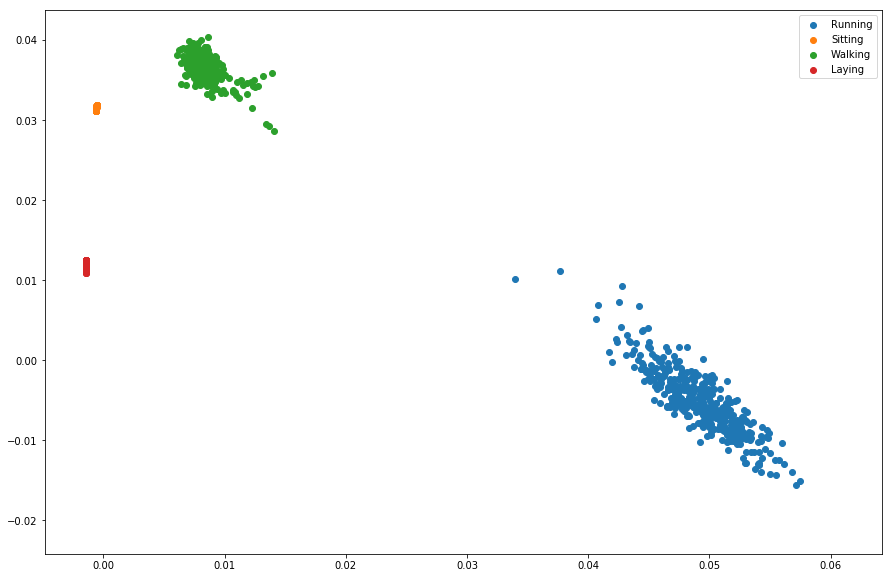

In [104]:
import matplotlib.pyplot as plt
colors= ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

filtered_data = []
#filtered_data=pd.DataFrame()
for i in range(0,4):
    #filtered_data[i]=reduced_data.loc[Xy_train_csv['y'] == i+1]
    filtered_data.append(reduced_data.loc[acc_x['y'] == i+1])


plt.figure(figsize=(15,10))
for i in range(0,4):
    plt.scatter(filtered_data[i][0],filtered_data[i][1], color=colors[i],label=labels[i])
    plt.legend(loc='upper right')
plt.show()

In [105]:
train_data['y']=acc_x['y']

In [106]:
train_data.head()

,x_acc_mean,y_acc_mean,z_acc_mean,x_gyro_mean,y_gyro_mean,z_gyro_mean,x_acc_std,y_acc_std,z_acc_std,x_gyro_std,...,x_gyro_max,y_gyro_max,z_gyro_max,x_acc_var,y_acc_var,z_acc_var,x_gyro_var,y_gyro_var,z_gyro_var,y
0,-0.218950,7.955274,-3.184923,-0.002429,-0.123464,-0.040160,2.179128,8.016286,3.171230,0.664390,...,1.433846,2.193379,1.264469,4.748600,64.260842,10.056698,0.441414,0.950023,0.541381,1
1,-0.549673,8.971948,-3.758262,0.064363,0.224664,-0.042291,2.901586,8.333936,3.910894,0.703172,...,1.532916,2.193379,1.285774,8.419202,69.454490,15.295092,0.494451,0.895130,0.587403,1
2,-0.582749,7.674039,-3.760704,0.057119,-0.042632,-0.185100,3.553182,8.679550,3.849088,0.713240,...,1.565939,1.757686,2.343582,12.625100,75.334588,14.815475,0.508711,0.617558,0.891905,1
3,-0.287196,8.730600,-3.737205,0.013848,-0.080065,-0.080449,3.722756,8.955863,3.931322,0.657740,...,1.733185,1.631985,2.733469,13.858912,80.207484,15.455292,0.432622,0.605258,1.288785,1
4,-0.534697,7.816218,-3.713922,-0.078446,0.125744,0.059335,3.789754,9.326009,4.294052,0.772373,...,2.558765,1.706554,2.733469,14.362234,86.974450,18.438882,0.596561,0.768378,1.052919,1


In [107]:
shuffle=train_data.sample(frac=1).reset_index(drop=True)

In [120]:
shuffle.shape

(1596, 31)

In [121]:
train_data=shuffle.iloc[0:train_count,0:30]
train_label=shuffle.loc[0:train_count-1,['y']]
test_data=shuffle.iloc[train_count:total,0:30]
test_label=shuffle.loc[train_count:total,'y']

In [122]:
train_count

1117

In [123]:
train_data.head()

,x_acc_mean,y_acc_mean,z_acc_mean,x_gyro_mean,y_gyro_mean,z_gyro_mean,x_acc_std,y_acc_std,z_acc_std,x_gyro_std,...,z_acc_max,x_gyro_max,y_gyro_max,z_gyro_max,x_acc_var,y_acc_var,z_acc_var,x_gyro_var,y_gyro_var,z_gyro_var
0,-0.366923,6.892763,-3.813353,0.040118,0.142916,0.020219,3.676806,9.183934,5.441094,0.911018,...,5.130774,2.171009,1.873800,3.413107,13.518899,84.344651,29.605502,0.829954,0.851999,1.366253
1,-0.338420,7.859158,-3.981737,0.007350,0.258731,0.036666,4.055446,9.554133,5.097861,1.056615,...,3.127426,2.476740,2.181662,3.448261,16.446639,91.281452,25.988182,1.116436,1.260350,1.158617
2,-0.424683,9.376556,-2.934597,0.033449,0.061040,-0.079426,1.521089,3.141942,2.508823,0.292239,...,1.825579,0.656203,0.627441,0.566721,2.313713,9.871800,6.294192,0.085403,0.151896,0.145353
3,-0.684071,9.767780,-2.658749,0.011334,0.012996,-0.046275,1.571033,2.921798,2.334352,0.289357,...,1.083376,0.525175,0.610397,0.695618,2.468144,8.536905,5.449197,0.083727,0.134530,0.156182
4,-0.258586,7.687434,5.039160,-0.013508,0.004602,-0.037774,0.015409,0.030277,0.044138,0.009056,...,5.133767,0.002131,0.012783,-0.033023,0.000237,0.000917,0.001948,0.000082,0.000017,0.000004


In [124]:
train_data.shape

(1117, 30)

In [125]:
train_label.shape

(1117, 1)

In [126]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print("Training input ",train_data.shape,"\nTraining label ",train_label.shape)
model = model.fit(train_data, train_label.values.ravel())

Training input  (1117, 30) 
Training label  (1117, 1)


In [127]:
import pickle
output = open('model.pkl', 'wb')
pickle.dump(model, output)
output.close()

In [128]:
predicted = model.predict(test_data)

In [129]:
print("Accuracy: ",model.score(test_data, test_label))

Accuracy:  1.0


             precision    recall  f1-score   support

    Running       1.00      1.00      1.00       121
    Sitting       1.00      1.00      1.00       117
    Walking       1.00      1.00      1.00       107
     Laying       1.00      1.00      1.00       134

avg / total       1.00      1.00      1.00       479



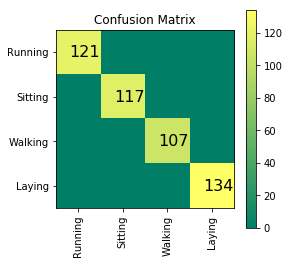

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('ggplot')

labels = {1:'Running', 2:'Sitting', 3:'Walking',
          4:'Laying'}

print (classification_report(test_label, predicted,
                            target_names=[l for l in labels.values()]))

conf_mat = confusion_matrix(test_label, predicted)

fig = plt.figure(figsize=(4,4))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
plt.xticks(range(4), [l for l in labels.values()], rotation=90)
plt.yticks(range(4), [l for l in labels.values()])
plt.show()

In [119]:
from sklearn.svm import SVC
clf = SVC(C=1., gamma=0.1, kernel='rbf', random_state=0)
clf.fit(train_data, train_label.values.ravel()) 
print(clf.score(test_data, test_label))

1.0


In [129]:
from sklearn_porter import Porter

porter = Porter(clf, language='java')
output = porter.export()

text_file = open("MyActivity.java", "w")
text_file.write(output)
text_file.close()